# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# Answer 1
### I chose the bikeshare hour count data set (that we used for the last assignmnet). I am using just Wednesday this time.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split


day_hour_count = pd.read_csv("../data/bikeshare_hour_count.csv")
day_hour_count = day_hour_count.fillna(0)

In [3]:
wed = day_hour_count[['wednesday']]
hour = day_hour_count[["hour"]]

In [4]:
poly15 = PolynomialFeatures(degree=15)

In [5]:
hour15 = poly15.fit_transform(hour)

In [6]:
linear15 = linear_model.LinearRegression()
linear15.fit(hour15, wed)


LinearRegression()

### Here, I am splitting the Wednesday dataset with train_test_split. I am then calculating the Training and Testing Errors

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(hour, wed, test_size=0.2)

xtrain15 = PolynomialFeatures(degree=15).fit_transform(xtrain)
xtest15 = PolynomialFeatures(degree=15).fit_transform(xtest)

train_linear15 = linear_model.LinearRegression().fit(xtrain15, ytrain)

MSEwed2 = metrics.mean_squared_error(ytrain, train_linear15.predict(xtrain15))
MAPEwed2 = metrics.mean_absolute_percentage_error(ytrain, train_linear15.predict(xtrain15))
print("MSE Wednesday - TRAINING SET:",MSEwed2)
print("MAPE Wednesday - TRAINING SET:",MAPEwed2)


MSE Wednesday - TRAINING SET: 24270.354892401312
MAPE Wednesday - TRAINING SET: 1213074847132983.0


In [29]:

MSEwed = metrics.mean_squared_error(ytest, train_linear15.predict(xtest15))
MAPEwed = metrics.mean_absolute_percentage_error(ytest, train_linear15.predict(xtest15))

print("MSE Wednesday - TEST SET:",MSEwed)
print("MAPE Wednesday - TEST SET:",MAPEwed)


MSE Wednesday - TEST SET: 44502.16744343735
MAPE Wednesday - TEST SET: 1.9995486320879172


### Below, I just plotted the test set and preditictions using the test data. I just did this to make sure everything look alright.

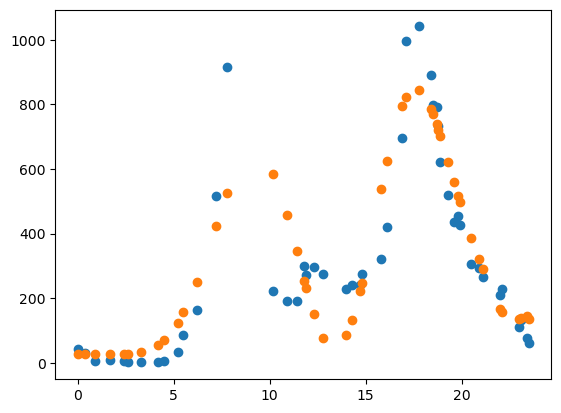

In [24]:
plt.scatter(xtest, ytest)
plt.scatter(xtest, train_linear15.predict(xtest15))